In [176]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import seaborn as snb
snb.set(font_scale=1.5)

# Assignment 3

# Random signal analysis: Detecting alpha-waves in the present of noise

Electroencephalography (EEG) a standard method to measure the electrical activity of the brain using electrodes placed on the scalp. It has become an important tool for diagnosing a wide variety of brain related diseases such as epilepsy, sleep disorders and head injuries. 
Even when a person is not performing any cognitive tasks, EEG will still capture brain activity. In fact, diagnosing is often based on examining the brain under such *resting state* conditions. Here, it is often interesting to detect the presence of so-called alpha-waves. Alpha-waves are usually defined to oscillations in the range 8-12Hz. We will refer to this interval as the *alpha frequency band*. Alpha-waves are considered a resting state condition because these lower frequency signals are particularly observed when a person is in a normal wakeful state, being relaxed while not concentrating on performing any particular task.

Due to the low strength of the electrical activity in the brain, EEG is very sensitive to noise and confounders, often resulting in noisy measurements. 

This assignment is split into two parts. In part 1, you are going to investigate the properties of *Gaussian white noise* and filtering signals containing noise. In part 2, you are going to construct a simple alpha-wave detector and investigate its performance when the signal is contaminated with white noise.

## Part 1: Gaussian white noise

We consider a simple, yet commonly used signal model:

$$y(n) = f(n) + e(n)$$

where $y(n)$ is the assumed observed measurements, $f(n)$ is the signal of interest, and $e(n)$ is additive Gaussian (normal distributed) noise. This is one of the most commonly used noise models and is therefore worth a closer look.

Let $e(n)$ for $n = 0, 1, ..., N-1$ be a random signal defined as

1) $e(n) \sim \mathcal{N}(0, \sigma_{\text{noise}}^2) $  

2) $e(n)$ and $e(m)$ are independent for $n \neq m$

This means that at all time points $n$, the observation $e(n)$ is assumed to follow a Normal distribution with zero mean and variance $\sigma^2_{\text{noise}}$. In other words, if we were to observe $M = 10000$ "parallel" versions of this signals and computed the histogram of the values at some time point $n = 100$, then the resulting distribution would be a normal distribution.

A signal with these properties is called Gaussian white noise.

Consider the vector $\mathbf{e} = \left[e(0), e(1), ..., e(N-1)\right]$, then the $n$'th element in this vector is a normal distribution with zero mean and variance $\sigma^2_{\text{noise}}$. 

***Question 1*** Argue that $\mathbf{e}$ follows a $N$-dimensional multivariate normal distribution and compute its mean vector $\mathbf{m}$ and its covariance matrix $\mathbf{V}$.

Vektorens elementer er hver især normalfordelinger, det svarer derfor til at en 1D vektor er en normalfordeling i 1D og for hvert element der tilføjes til vektoren svarer det til at tilføje endnu en dimension til normalfordelingen.

https://www.itl.nist.gov/div898/handbook/pmc/section5/pmc541.htm

Mean vector $\mathbf{m}$

$\mathbf{m} = \frac{e}{|e|}$

Covariance Matrix $\mathbf{V}$

Fordi n og m er uafhængige 

$$
\mathbf{V} = 
 \begin{pmatrix}
  \sigma_{1,1}^{2} & 0 & \cdots & 0 \\
  0 & \ddots & \cdots & 0 \\
  \vdots  & \vdots  & \sigma_{(n-1,m-1)}^{2} & \vdots  \\
  0 & 0 & \cdots & \sigma_{n,m}^{2} 
 \end{pmatrix}
$$

Recall that if $\textbf{x} \sim \mathcal{N}(\mathbf{m}, \mathbf{S})$ and $\mathbf{c} = \mathbf{A}\mathbf{x} + \mathbf{b}$, then $\mathbf{c}$ follows a multivariate normal distribution with mean $\mathbf{A}\mathbf{m} + \mathbf{b}$ and covariance matrix $\mathbf{A}\mathbf{S}\mathbf{A}^T$. In other words, 

$$\mathbf{c} \sim \mathcal{N}(\mathbf{A}\mathbf{m} + \mathbf{b}, \mathbf{A}\mathbf{S}\mathbf{A}^T)$$

***Question 2*** Compute the mean and covariance matrix for the random variable $\mathbf{z}$ when

$$
\begin{align*}
\mathbf{z} = \begin{bmatrix}1 & 0.5 \\ 0.5 & 1\end{bmatrix}\mathbf{x} + \begin{bmatrix}1 \\ 1\end{bmatrix}, \quad\quad\quad \text{and} \quad\quad\quad \mathbf{x} \sim \mathcal{N}\left(\begin{bmatrix}0 \\ 0\end{bmatrix} \begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}\right)
\end{align*}
$$


Let's now investigate the frequency content of the additive Gaussian white noise signal. Let $\mathbf{V}$ be a $N \times N$ orthonormal basis matrix containing discrete harmonic basis functions. 

Let $\mathbf{e}$ be a white noise vector with the distribution you computed in Question 1. The coordinates of $\mathbf{e}$ expressed in the new basis is given by

$$\mathbf{z} = \mathbf{V}^T \mathbf{e}$$

***Question 3*** . Argue that $\mathbf{z}$ follows a multivariate normal distribution and show that its distribution is given by $\mathbf{z} \sim \mathcal{N}(\mathbf{0}, \sigma^2_{\text{noise}} \mathbf{I})$.

Hint: Recall that for any orthonormal matrix it holds that $\mathbf{V}^T\mathbf{V} = \mathbf{I}$. 



The statement above shows that each element $z_k$ follows a normal distribution with zero-mean and variance $\sigma^2_n$. This implies that the energy of the white noise signal is distributed evenly across all frequency component, which explains the name "white noise".

### Simulating white noise processes

In the following, we will investigate the properties of white noise empirically. To do this we will simulate $M = 10000$ realizations of a white noise process of length $N = 501$ and variance $\sigma^2_{\text{noise}} = 5$. Since the processes are inherently random, we need to simulate a large number of processes and look at averages.

***Question 4*** Complete the implementation of the white noise function below:

Hint: The distribution of the white noise signal is just $\mathcal{N}(0, \sigma^2_{\text{noise}})$ at any time

In [213]:
def white_noise(N, M, sigma2_noise):
    # returns a N x D matrix, where each column is a realization from a white noise process with variance sigma2_noise
    mat = np.zeros((N, M))
    mu = 0
    s = np.random.normal(mu, np.sqrt(sigma2_noise), N)
    for i in range(M):
        mat[:,i] = s
    return mat

print("mean", np.abs(np.mean(white_noise(500, 1000, 5))))
print("variance", np.abs(np.var(white_noise(500, 1000, 5)) - 5))

mean 0.05832275040461046
variance 0.23451141607004367


The following lines will make a sanity check of your implementation. If the next cell produces an error, you need to go back and check your implementation of the function white_noise.

In [224]:
assert white_noise(500, 1000, 5).shape == (500, 1000), "The shape of the signals is wrong"
assert np.abs(np.mean(white_noise(500, 1000, 5))) < 0.1, "The mean of the signal is wrong"
assert np.abs(np.var(white_noise(500, 1000, 5)) - 5) < .1, "The variance of signals is wrong"


The following code simulates $M = 10000$ realizations from the process and plots the first three realizations.

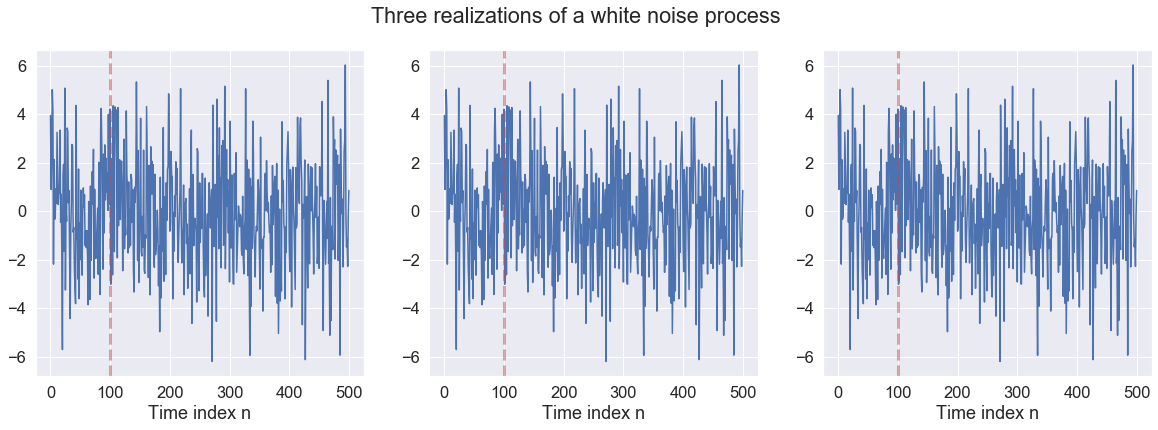

In [225]:
# seed
np.random.seed(0)

# number of realizations
M = 10000

# number of time points
N = 501

# noise variance
sigma2_noise = 5

# sampling frequency
fs = 51

# simulate data
E = white_noise(N, M, sigma2_noise)

ns = np.arange(N)
time_idx = 100

plt.figure(figsize=(20, 6))
for k in range(3):
    plt.subplot(1, 3, 1 + k)
    plt.plot(E[:, k]);
    plt.axvline(ns[time_idx], linestyle='--', color='r', alpha=0.5, linewidth=3)
    plt.xlabel('Time index n')

plt.suptitle('Three realizations of a white noise process');

and let's check that the distribution of the the signal is in fact Gaussian at time $n = 100$ (indicated by the dashed red line above)

***Question 5*** Estimate the mean and variance of the distribution shown below. The code then plots the density of a normal distribution with that mean and variance on top of the histogram in the figure. Comment on the figure.

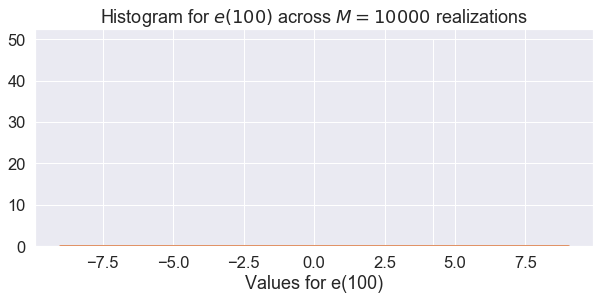

In [226]:
plt.figure(figsize=(10, 4))
plt.hist(E[time_idx, :], 50, density=True);
plt.title('Histogram for $e(%d)$ across $M = %d$ realizations' % (time_idx, M));

npdf = lambda x, m, v: np.exp(-(x-m)**2/(2*v))/np.sqrt(2*np.pi*v)

m_signal = np.mean(E[time_idx, :])
v_signal = np.var(E[time_idx, :])

xs = np.linspace(-9, 9, 1000)
plt.plot(xs, npdf(xs, m_signal, v_signal), linewidth=3)
plt.grid(True)
plt.xlabel('Values for e(%d)' % time_idx);
    

Recall that for a signal $e(n)$ for $n = 0, 1, ..., N-1$, the energy of $e(n)$ can be computed as 

$$E_e = \sum_{n=0}^{n-1} e(n)^2$$

***Question 6*** Complete the function compute_energy below

In [181]:
def compute_energy(y):
    # returns and computes the energy of a signal y, where y is a vector of length N
    return sum(y**2)



Again, let do a sanity check of your implementation. If you can an error, you need to go back and check your implementation.

In [182]:
assert(np.abs(compute_energy(white_noise(10000, 1, 1)) - 10000) < 300)
assert(np.abs(compute_energy(2*white_noise(10000, 1, 1)) - 40000) < 1000)

### Estimating the frequency content

Let's now compute the frequency representation for all $M$ realizations using $\mathbf{z} = \mathbf{V}^T \mathbf{y}$. Next, we will compute the plot the variance of each element in $z$ across the $M$ realizations

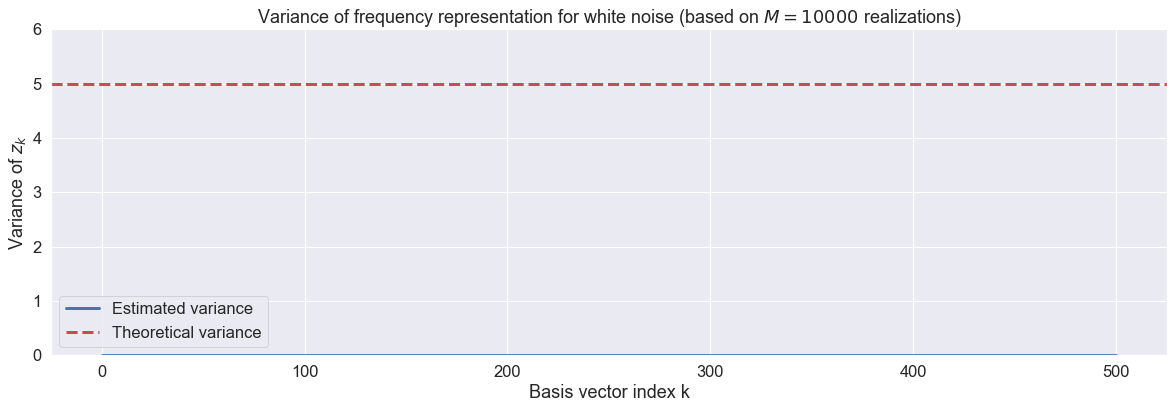

In [183]:
def create_basis(N, fs):

    # make sure we have an odd number N
    assert N % 2 == 1

    ns = np.arange(N)
    V = np.zeros((N,N))
    
    n_pairs = int((N-1)/2)

    freqs = np.arange(int(0.5*N)+1)*fs/N
    
    # first basis vector
    V[:,0] = np.ones(N)
    
    # remaining basis vectors
    for k in range(1,n_pairs + 1):
        # in each column we are going to define cosine or sine function with frequency k
        V[:,2*k-1] = np.sqrt(2)*np.cos(2*np.pi*ns/N*k) ## at each step we are filling this is a column
        V[:,2*k] = np.sqrt(2)*np.sin(2*np.pi*ns/N*k)
        

    V = V/np.sqrt(N)    
    
    return freqs, V


def compute_spectrum(y, V, scale=True):
    z = V.T@y

    z_cos = z[2::2] 
    z_sin = z[1::2]
    amp_spectrum = np.sqrt(z_cos**2 + z_sin**2)
    amp_spectrum = np.hstack((np.abs(z[0]), amp_spectrum))
    
    if scale:
        scales = np.ones(len(amp_spectrum))
        scales[0] = 1
        scales[1:] = np.sqrt(2)


        return amp_spectrum/np.sqrt(len(y))*scales
    else:
        return amp_spectrum



# prepare basis matrix V
freqs, V = create_basis(N, fs)

# compute coordinates in new basis
Z = V.T@E

# compute variances of Z
varZ = np.var(Z, 1)



plt.figure(figsize=(20, 6))
plt.plot(varZ, label='Estimated variance', linewidth=3)
plt.axhline(sigma2_noise, color='r', linewidth=3, label='Theoretical variance', linestyle='--')
plt.xlabel('Basis vector index k')
plt.ylabel('Variance of $z_k$')
plt.title('Variance of frequency representation for white noise (based on $M = %d$ realizations)' % M)
plt.legend()
plt.ylim(0, 6)
plt.grid(True)


We have now empirically validated our theoretical finding from Question 3. That is, we have shown that the energy/variance of white noise is distributed evenly across all frequency components. For this reason, we often say that white noise has a flat spectrum.

### Filtering white noise

Since white noise "contains" all frequencies up to the Nyquist frequency, we can use white noise to understand the behavoiur of a filter. The idea is to compare the frequency representation of white noise before and after applying the filter. Since we know that the spectrum will be flat before filtering, by looking at the (averaged) spectrum after filtering, we can see which frequencies are amplified by the filter and which frequencies are attennuated by the filter.

Below you are given a filter denoted as $h$. The length of the filter is 32.


In [184]:
h = np.array([-0.0022, -0.0010, 0.0007, -0.0005, -0.0001, 0.0096, 0.0129, -0.0165, -0.0490,
              -0.0107, 0.0802, 0.0834, -0.0519, -0.1500, -0.0445, 0.1381, 0.1381, -0.0445,
              -0.1500, -0.0519, 0.0834, 0.0802, -0.0107, -0.0490, -0.0165, 0.0129, 0.0096,
              -0.0001, -0.0005, 0.0007, -0.0010, -0.0022, ])

Let's investigate this filter by

1. Computing the convolution between all of the $M$ realization of white noise and the filter h.  


2. Computing and plotting the averaged frequency representation of the filtered signals

The code below computes the frequency representation of the filtered white noise signals and plots the variance of each element in $\mathbf{z}$ across $k$, but you need to fill in the missing pieces.

***Question 7*** Filter each of the $M = 10000$ realization of white noise with the filter $h$ using the function apply_filter and fill in the missing pieces

In [185]:
from scipy.signal import convolve

def apply_filter(y, h):
    return convolve(y, h, 'same')

E_filtered = np.zeros(E.shape)
for m in range(M):
    # your solution goes here
    E_filtered[:, m] = apply_filter(?,?)
    
# compute coordinates of the filtered signals in new basis
Z_filtered = V.T@E_filtered #

plt.figure(figsize=(20, 6))
plt.plot(np.var(Z, 1), 'r', label='Estimated variance of white noise')
plt.plot(np.var(Z_filtered, 1), 'b', label='Estimated variance of filtered white noise')
plt.xlabel('Basis vector index j')
plt.ylabel('Variance of $z_j$')
plt.title('Average frequency representation of filtered white noise (based on $M = %d$ realizations)' % M)
plt.legend()
plt.ylim(0, 6);


SyntaxError: invalid syntax (<ipython-input-185-98ca849781ec>, line 9)

Recall that the first basis vector is a constant, whereas the remaining basis vectors comes in pairs of cosine and sine-functions. We can compute the analysis frequency corresponding to the $k$'th pair of cosine and sine functions as:

$$f_{\text{analysis}}(k) = k\frac{f_s}{N}$$

The basis vector with index $j = 201$ corresponds to $k = 100$ and has the following analysis frequency

$$f_{\text{analysis}}(k) = k\frac{f_s}{N} = 100\frac{51Hz}{501} \approx 10.2Hz $$

***Question 8*** Based on the plot above, what can you say about the filter $h$? What type of filter is it? 

***Optional question***: Evaluate the code to compute and plot the frequency response of the filter by first zero-padding the filter to have length $N$ and then computing the amplitude spectrum of the zero-padded filter

In [ ]:
htilde = np.zeros(N)
htilde[:len(h)] = h

plt.figure(figsize=(10, 5))
plt.plot(freqs, compute_spectrum(htilde, V))
plt.xlabel('Frequency ')
plt.title('Frequency response of filter h')

## Part 2: Detecting alpha waves

In this part of the assignment you are going to build and evaluate an alpha wave detector.  

First we will load the simulated data we are going to work with, and split it into a test and training set.

In [186]:
data = np.load('./eeg_sim.npz')
Y = data['Y']
labels = data['labels']

print(Y.shape)
print(labels.shape)

M_train = 1000

Y_train = Y[:M_train, :]
Y_test = Y[M_train:, :]
labels_train = labels[:M_train]
labels_test = labels[M_train:]

(10000, 501)
(10000,)


The variable $Y$ contains $M = 10000$ time-series of length $N = 501$. Roughly half of these time-series contains alpha-waves. The array $\text{labels}$ contains zeros and ones, where a "1" indicates that the corresponding time-series contains alpha-waves and "0" indicates that theres no alpha-waves present. The purpose of the rest of the assignment is to construct a detector for alpha-waves.



Now, let's visualize the data

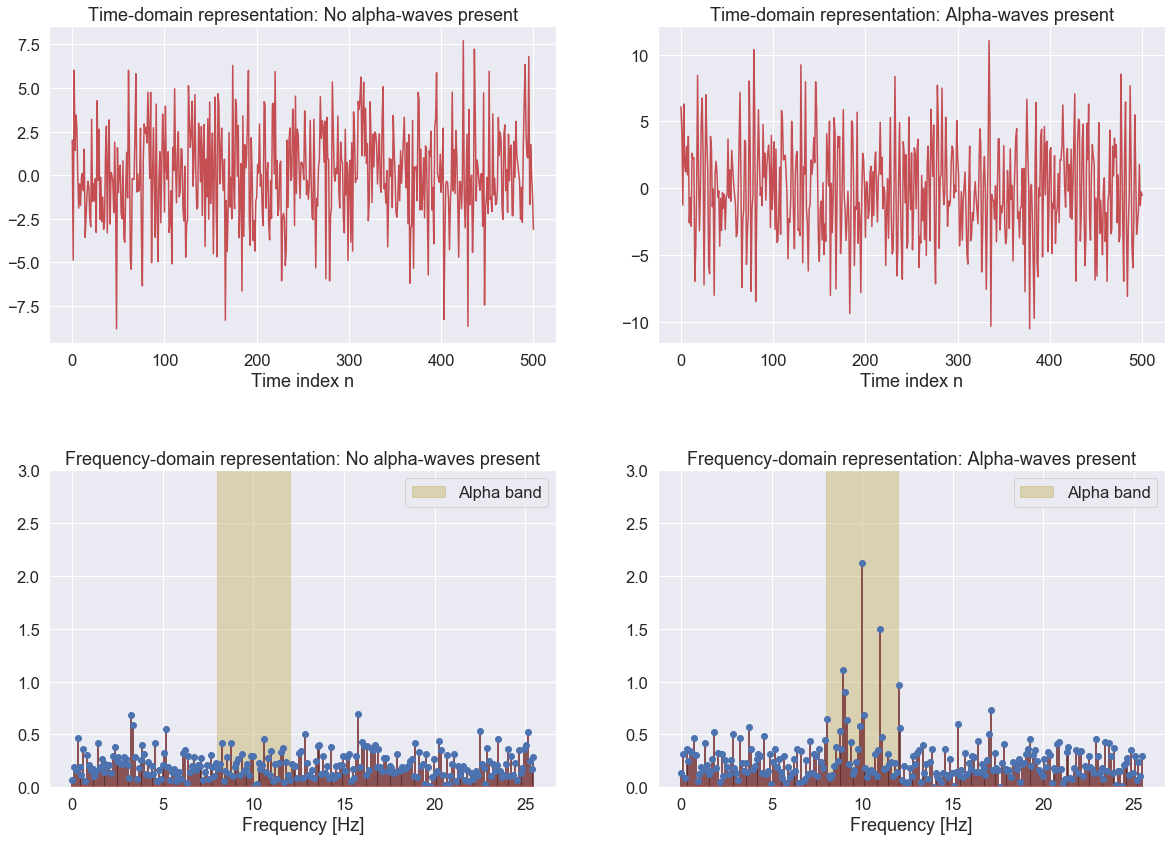

In [171]:
no_alpha_idx = np.where(labels_train==0)[0][0]
alpha_idx = np.where(labels_train==1)[0][0]

C0 = compute_spectrum(Y_train[no_alpha_idx], V)
C1 = compute_spectrum(Y_train[alpha_idx], V)

fig = plt.figure(figsize=(20, 14))

plt.subplot(2, 2, 1)
plt.plot(Y_train[no_alpha_idx], 'r')
plt.title('Time-domain representation: No alpha-waves present')
plt.xlabel('Time index n')

plt.subplot(2, 2, 2)
plt.plot(Y_train[alpha_idx], 'r')
plt.title('Time-domain representation: Alpha-waves present')
plt.xlabel('Time index n')

plt.subplot(2, 2, 3)
plt.stem(freqs, C0, 'r.', use_line_collection=True)
plt.vlines(freqs, C0, 0, alpha=0.5)
plt.ylim(0, 3)
plt.title('Frequency-domain representation: No alpha-waves present')
plt.fill_between(np.linspace(8, 12, 10), 3*np.ones(10), color='y', alpha=0.5, label='Alpha band')
plt.xlabel('Frequency [Hz]')
plt.legend()


plt.subplot(2, 2, 4)
plt.stem(freqs, C1, 'r.', use_line_collection=True)
plt.vlines(freqs, C1, 0, alpha=0.5)
plt.title('Frequency-domain representation: Alpha-waves present')
plt.ylim(0, 3)
plt.fill_between(np.linspace(8, 12, 10), 3*np.ones(10), color='y', alpha=0.5, label='Alpha band')
plt.xlabel('Frequency [Hz]')
plt.legend()

fig.subplots_adjust(hspace=0.4)



The top row shows the time-domain representation for two of the time-series and the bottom row shows the corresponding amplitude spectres. The signal visualized in the right column contains alpha waves, whereas the signal in the left column does not. 

As suggested by the figure, we can use the energy in the alpha frequency band, i.e. the energy distributed across the frequency interval 8-12Hz, to detect the alpha waves.

### Calculating the energy in the alpha band

We will use the total energy in the alpha frequency band (shown in yellow above) as a feature for detecting the alpha waves.

***Question 9***: Complete the implementation of the function compute_alpha_energy below. Hint: use the previously implemented apply_filter and compute_energy functions.


In [172]:
def compute_alpha_energy(y, h):
    # the function takes an N-dimensional signal y and
    # 1. applies the filter h 
    # 2. computes and returns the energy of the resulting signal
    
    # your implementation goes here
    yfil = ? #apply filter
    energy = ? #compute the energy
    return energy

SyntaxError: invalid syntax (<ipython-input-172-8c36975d3b78>, line 7)

In [ ]:
# compute energy in alpha band for all time-series
alpha_energies = np.zeros(M_train)
for m in range(M_train):
    alpha_energies[m] = compute_alpha_energy(Y[m], h)




### Visualizing the energies in the alpha-band

In [ ]:
bins = np.linspace(0, 4000, 40)
plt.figure(figsize=(10, 4))
plt.hist(alpha_energies[labels_train==0], bins,  color='r', density=True, label='No alpha-waves', alpha=0.5 )
plt.hist(alpha_energies[labels_train==1], bins, color='g', density=True,  label='With alpha-waves', alpha=0.5);
plt.legend()
plt.xlabel('Energy in alpha band')

### Log energies

In [ ]:
log_bins = np.linspace(5, 9, 40)
plt.figure(figsize=(10, 4))
plt.hist(np.log(alpha_energies[labels_train==0]), log_bins, color='r',density=True, label='No alpha-waves', alpha=0.5)
plt.hist(np.log(alpha_energies[labels_train==1]), log_bins, color='g', density=True, label='With alpha-waves', alpha=0.5);
plt.legend()
plt.xlabel('Log energy in alpha band')

### Fitting Bayesian classifier (from week 3)

***Question 10*** Use Bayesian classification (as in week 3), by first fitting two normal distributions to the two subpopulations of the log alpha energies, and use those as likelihood when computing the posterior. Hint: The prior probabilities can be estimated by the fraction of signals with alpha waves in the data set.

***Question 11*** Comment on, why you use the log transformed energies insted of the energies directly.

In [ ]:
#evaluate the log density of the normal distribution N(x|m,v)
log_npdf = lambda x, m, v: np.exp(-(x-m)**2/(2*v))/np.sqrt(2*np.pi*v)

#return posterior probability for alpha energy present
def compute_posterior(log_alpha_energy):
    post_prob = ?
    return post_prob


def classify(y):
    alpha_energy = compute_alpha_energy(y, h)
    log_alpha_energy = np.log(alpha_energy)
    
    post = compute_posterior(log_alpha_energy)
    return 1.0*(post > 0.5)



plt.figure(figsize=(10, 6))
plt.plot(xs, compute_posterior(xs))
plt.xlabel('Log alpha energy')
plt.title('Posterior probability of alpha waves present')

### Evaluate on training and test sets

***Question 12*** Compute and evaluate the training and test accuracy of your classifier. 